<a href="https://colab.research.google.com/github/Captainlion8/Travel_guide/blob/main/project_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = "updated_tt.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit,Best Time to Visit (Season)
0,0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,NaN,Historical,Yes,2.60,Evening,November - February
1,1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,NaN,Historical,Yes,0.40,Afternoon,November - February
2,2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,NaN,Religious,No,0.40,Afternoon,November - February
3,3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Yes,0.27,Evening,November - February
4,4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,NaN,Scientific,Yes,0.31,Morning,November - February


In [3]:
df.isnull().sum()

,0
Unnamed: 0,0
Zone,0
State,0
City,0
Name,0
Type,0
Establishment Year,0
time needed to visit in hrs,0
Google review rating,0
Entrance Fee in INR,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        325 non-null    int64  
 1   Zone                              325 non-null    object 
 2   State                             325 non-null    object 
 3   City                              325 non-null    object 
 4   Name                              325 non-null    object 
 5   Type                              325 non-null    object 
 6   Establishment Year                325 non-null    object 
 7   time needed to visit in hrs       325 non-null    float64
 8   Google review rating              325 non-null    float64
 9   Entrance Fee in INR               325 non-null    int64  
 10  Airport with 50km Radius          325 non-null    object 
 11  Weekly Off                        32 non-null     object 
 12  Signific

In [5]:
df.describe()

,Unnamed: 0,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Number of google review in lakhs
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,162.000000,1.807692,4.486154,115.809231,0.408438
std,93.963645,0.971398,0.274580,530.859785,0.646668
min,0.000000,0.500000,1.400000,0.000000,0.010000
25%,81.000000,1.000000,4.400000,0.000000,0.059000
50%,162.000000,1.500000,4.500000,0.000000,0.170000
75%,243.000000,2.000000,4.600000,40.000000,0.500000
max,324.000000,7.000000,4.900000,7500.000000,7.400000


In [6]:
#Selecting relevant columns for training
columns = ['Name', 'City', 'Type', 'Significance', 'Best Time to Visit (Season)']
df = df[columns].dropna()

# Encoding categorical variables
encoder_city = LabelEncoder()
encoder_type = LabelEncoder()
encoder_season = LabelEncoder()

df['City'] = encoder_city.fit_transform(df['City'])
df['Type'] = encoder_type.fit_transform(df['Type'])
df['Best Time to Visit (Season)'] = encoder_season.fit_transform(df['Best Time to Visit (Season)'])

Model Accuracy: 0.75


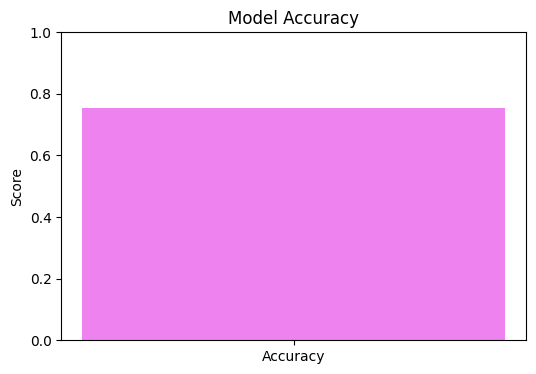

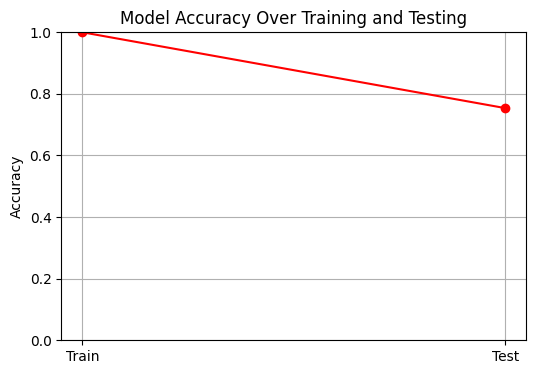

In [7]:
# Splitting data into training and testing sets
X = df[['Type', 'City']]
y = df['Best Time to Visit (Season)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Plot accuracy graph
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color=['violet'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Accuracy')
plt.show()

# Plot accuracy graph (Linear graph)
plt.figure(figsize=(6, 4))
plt.plot(['Train', 'Test'], [1, accuracy], marker='o', linestyle='-', color='red')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Training and Testing')
plt.grid(True)
plt.show()

In [8]:
# Function to recommend places based on city
def recommend_places(city):
    city_encoded = encoder_city.transform([city])[0]
    city_data = df[df['City'] == city_encoded].copy()
    if city_data.empty:
        return "No recommendations available"

    city_data.loc[:, 'Type'] = encoder_type.inverse_transform(city_data['Type'].values)
    city_data.loc[:, 'Best Time to Visit (Season)'] = encoder_season.inverse_transform(city_data['Best Time to Visit (Season)'].values)

    recommendations = city_data[['Name', 'Type', 'Best Time to Visit (Season)']]
    return tabulate(recommendations, headers=['Place Name', 'Place Description', 'Best Time to Visit (Season)'], tablefmt='grid', showindex=False)

# Example usage
city_input = "Mumbai"
output = recommend_places(city_input)
print(f"Recommended places in {city_input}:")
print(output)

Recommended places in Mumbai:
+------------------------------------------------+---------------------+-------------------------------+
| Place Name                                     | Place Description   | Best Time to Visit (Season)   |
+================================================+=====================+===============================+
| Marine Drive                                   | Promenade           | November - February           |
+------------------------------------------------+---------------------+-------------------------------+
| Gateway of India                               | Monument            | November - February           |
+------------------------------------------------+---------------------+-------------------------------+
| Chhatrapati Shivaji Maharaj Vastu Sangrahalaya | Museum              | November - February           |
+------------------------------------------------+---------------------+-------------------------------+
| Sanjay Gandhi National 

<ipython-input-8-383d59ec2f33>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Promenade' 'Monument' 'Museum' 'National Park' 'Temple' 'Temple'
 'Religious Shrine' 'Beach' 'Amusement Park' 'Monument']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  city_data.loc[:, 'Type'] = encoder_type.inverse_transform(city_data['Type'].values)
<ipython-input-8-383d59ec2f33>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['November - February' 'November - February' 'November - February'
 'November - February' 'November - February' 'November - February'
 'November - February' 'November - February' 'November - February'
 'November - February']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  city_data.loc[:, 'Best Time to Visit (Season)'] = encoder_season.inverse_transform(